## MOwNiT 
### Julia Smerdel, ZadanieDomowe 4

Zad 1. Implementacja własnej interpolacji wielomianowej korzystając ze wzoru Lagrange'a.

Szukamy wielomianu $P_n(x)$ przechodzącego przez punkty $(x_k, y_k)$.

$L_k(x) = \frac {d}{m} = \prod_{i=0, i \neq {k}}^{n} \frac {x - x_i}{(x_k - x_i)}$

$P_n(x) = \Sigma_{k=0}^{n} f(x_k) L_k(x)$, gdzie $f(x_k)$ to współczynniki, a $L(x_k)$ to baza Lagrange'a

In [1]:
function Lagrange(X, Y, n, k, x) #f(xk)Lk(x)
    val = 1
    for i in 1:n
        if i != k
            val *= (x - X[i])/(X[k] - X[i])
        end
    end
    
    return val * Y[k]
    
end

Lagrange (generic function with 1 method)

In [2]:
function LagrangeInterpolation(x, X, Y)
    n = length(X)
    ans = 0
    for i in 1:n
        ans += Lagrange(X, Y, n, i, x)
    end
    return ans
end

LagrangeInterpolation (generic function with 1 method)

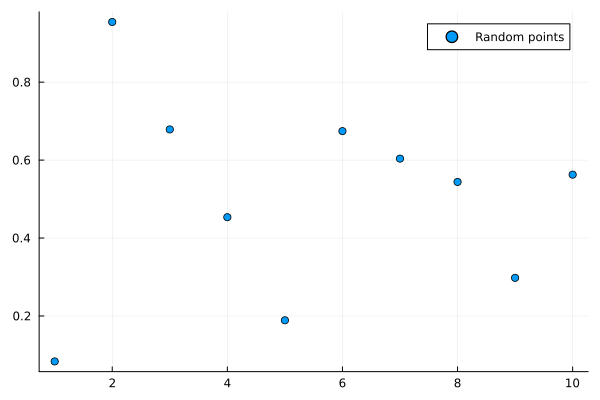

In [3]:
using Plots

XRand = [i for i in 1:10]
YRand = [rand() for x in XRand]
scatter(XRand, YRand, label="Random points")

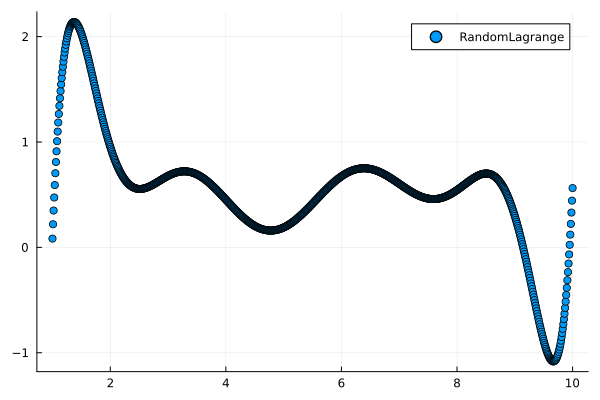

In [4]:
forInterpolation = 1:0.01:10
YLagrange = [LagrangeInterpolation(i, XRand, YRand) for i in forInterpolation]
scatter(forInterpolation, YLagrange, label="RandomLagrange")

Sprawdzenie dla znanych wartości

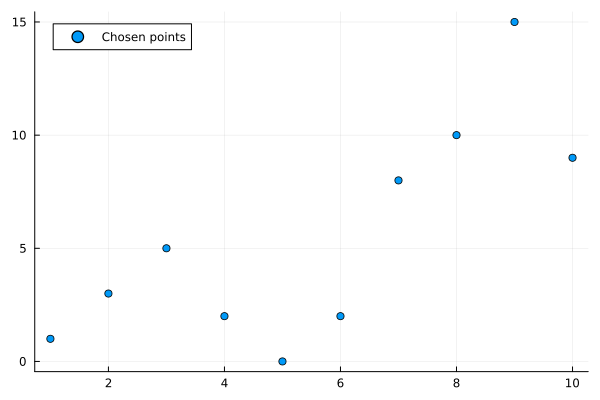

In [5]:
X = [i for i in 1:10]
Y = [1, 3, 5, 2, 0, 2, 8, 10, 15, 9]
scatter(X, Y, label="Chosen points")

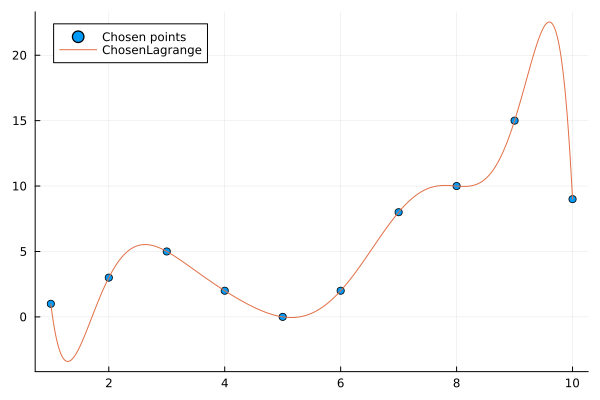

In [6]:
YLagrange = [LagrangeInterpolation(i, X, Y) for i in forInterpolation]
plot!(forInterpolation, YLagrange, label="ChosenLagrange")

Zad 2.  Implementacja własnej interpolacji wielomianowej korzystając ze wzoru Newtona.

$P_n(x) = f[x_0] + \Sigma_{k=1}^{n} f[x_0, x_1, ..., x_k](x-x_0)...(x-x_{k-1})$

0-wy iloraz różnicowy: $f[x_i] = f(x_i)$

1-szy iloraz różnicowy: $f[x_i, x_{i+1}] = \frac {f[x_{i+1}]-f[x_i]}{x_{i+1}-x_i}$

k-ty iloraz różnicowy: $f[x_i, x_{i+1}, ..., x_{i+k}] = \frac {f[x_{i+1}, x_{i+2}, ..., x_{i+k}] - f[x_i, x_{i+1}, ..., x_{i+k-1}]}{x_{i+k}-x_i}$

Do obliczania wartości wielomianu dla konkretnego x można użyć wzoru

$W(x) = \Sigma_{k=0}^nb_kp_k(x)$

$p_0 = 1$

$p_k(x) = (x-x_0)(x-x_1)...(x-x_{k-1})$

In [7]:
function Horner(x, array, X)
    n = length(X)
    p = 1
    w = array[1]
    
    for i in 2:n
        p = p * (x - X[i-1])
        w = w + p * array[i]
    end
    
    return w
    
end

Horner (generic function with 1 method)

In [8]:
function NewtonInterpolation(X, Y)
    n = length(X)
    array = zeros(n, n)
    #building difference quotient array
    
    #0
    for i in 1:n
        array[i, 1] = Y[i] 
    end
    
    #1 
    for i in 2:n
        array[i, 2] = (array[i, 1] - array[i-1, 1])/(X[i] - X[i-1]) #due to indexing from 1 there is a shift
    end
    
    #go deeper
    for j in 3:n
        for i in j:n
            array[i, j] = (array[i, j-1] - array[i-1, j-1])/(X[i] - X[i-j+1]) 
        end
    end
    
    newt = [array[i, i] for i in 1:n] #we will use only diagonal's values
    return newt
    
end

NewtonInterpolation (generic function with 1 method)

In [9]:
# arr = NewtonInterpolation(XRand, YRand)
# horner = [Horner(x, arr, XRand) for x in forInterpolation]
# scatter(forInterpolation, horner, label="RandomNewton")

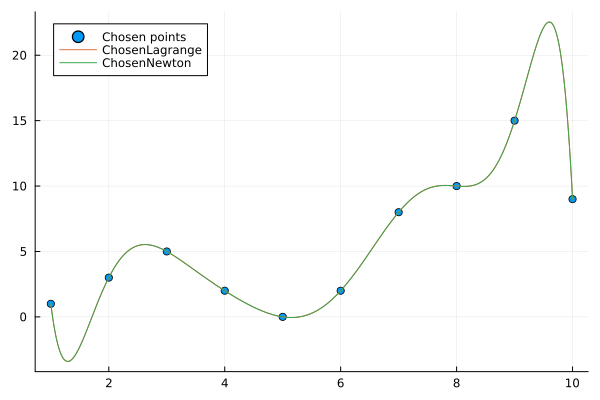

In [10]:
arr = NewtonInterpolation(X, Y)
horner = [Horner(x, arr, X) for x in forInterpolation]

plot!(forInterpolation, horner, label="ChosenNewton")

Zad 3. Wykorzystanie interpolacji wielomianowej z pakietu Polynomials

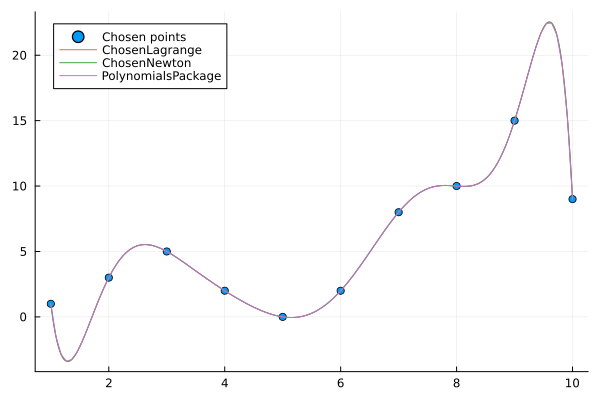

In [11]:
using Polynomials
f = fit(X, Y)
plot!(f, extrema(X)..., label="PolynomialsPackage")

Zad 4. Pomiar czasu

In [12]:
function pointsGenerator(n)
    X = [i for i=1:n]
    Y = [rand() for x in X]
    return X, Y
end

pointsGenerator (generic function with 1 method)

In [13]:
function LagrangeTime(X, Y)
    return sum([@elapsed LagrangeInterpolation(i, X, Y) for i in forInterpolation])
end

LagrangeTime (generic function with 1 method)

In [14]:
function NewtonTime(X, Y)
    polynomialTime = @elapsed NewtonInterpolation(X, Y)
    arr = NewtonInterpolation(X, Y)
    hornerTime = sum([@elapsed Horner(x, arr, X) for x in forInterpolation])
    return polynomialTime + hornerTime
end

NewtonTime (generic function with 1 method)

In [15]:
function PolynomialsTime(X, Y)
    polynomialTime = @elapsed fit(X, Y)
    f = fit(X, Y)
    calcTime = sum([@elapsed f(x) for x in forInterpolation])
    return polynomialTime + calcTime
end

PolynomialsTime (generic function with 1 method)

In [16]:
using DataFrames
df = DataFrame(pointsNumber = Int64[], interpolationType = String[], time = Float64[])

Row,pointsNumber,interpolationType,time
,Int64,String,Float64


In [17]:
for i in 10:100:1000
    for j in 1:11
        X, Y = pointsGenerator(i)
        push!(df, (i, "Lagrange", LagrangeTime(X, Y)) )
        push!(df, (i, "Newton", NewtonTime(X, Y)) )
        push!(df, (i, "Polynomials", PolynomialsTime(X, Y)) )
    end
end
df

Row,pointsNumber,interpolationType,time
,Int64,String,Float64
1,10,Lagrange,0.000160376
2,10,Newton,1.8165e-5
3,10,Polynomials,3.4502e-5
4,10,Lagrange,0.000144959
5,10,Newton,1.2167e-5
6,10,Polynomials,1.7999e-5
7,10,Lagrange,0.000144836
8,10,Newton,1.0503e-5
9,10,Polynomials,1.0959e-5


In [18]:
using Statistics
stats = combine(groupby(df, [:interpolationType, :pointsNumber]), "time" => mean, "time" => std)

Row,interpolationType,pointsNumber,time_mean,time_std
,String,Int64,Float64,Float64
1,Lagrange,10,0.000146265,4.6913e-6
2,Newton,10,1.20266e-5,2.73681e-6
3,Polynomials,10,1.38496e-5,7.15798e-6
4,Lagrange,110,0.0381408,0.00016558
5,Newton,110,6.55786e-5,2.84487e-6
6,Polynomials,110,2.44581e-5,3.63064e-6
7,Lagrange,210,0.155946,0.000999362
8,Newton,210,0.000144225,1.46964e-5
9,Polynomials,210,4.59512e-5,6.17393e-6


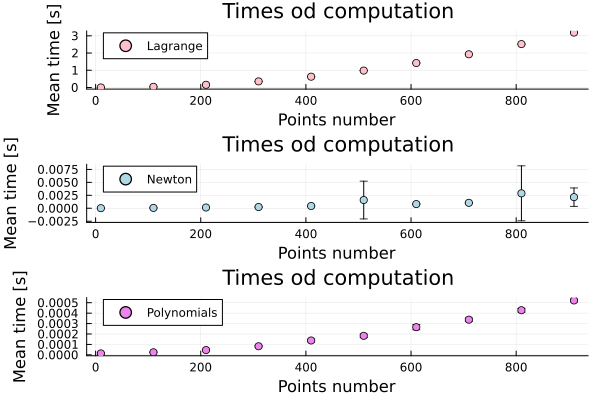

In [19]:
scatter(stats.pointsNumber, stats.time_mean, group=stats.interpolationType, yerr = stats.time_std, 
xlabel = "Points number", ylabel="Mean time [s]", title="Times od computation", layout=(3, 1), color=[:pink :lightblue :violet])

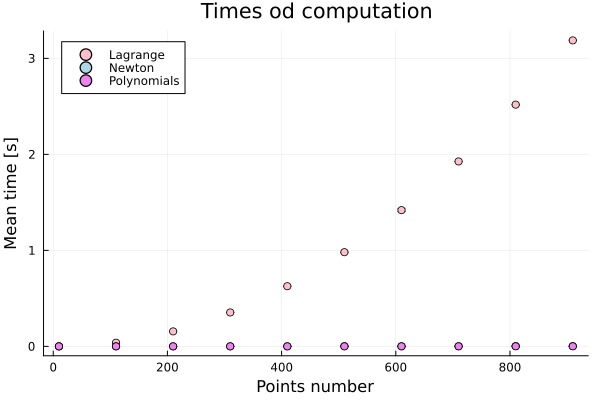

In [20]:
scatter(stats.pointsNumber, stats.time_mean, group=stats.interpolationType, yerr = stats.time_std, 
xlabel = "Points number", ylabel="Mean time [s]", title="Times od computation", color=[:pink :lightblue :violet])

Zad 5. Implementacja algorytmu Neville'a.

$P_{12} = \frac {(x-x_2)P_1-(x-x_1)P_2}{x_1-x_2}$

$P_{12}(x_1) = P_1$

$P_{12}(x_2) = P_2$

$P_1, P_2, P_3, P_4$ - wielomian stopnia 0 przechodzący przez $(x_i, f_i)$

$P_{12}, P_{23}, P_{34}$ - wartość w x dla wielomianów stopnia 1, przechodzącego przez pary punktów

In [21]:
function NevilleInterpolation(X, Y, x)
    n = length(X)
    array = zeros(Float64, n, n)
    
    for i in 1:n
        array[i, 1] = Y[i] #0
    end
    
    
    for j in 2:n
        for i in j:n
            array[i, j] = ((x - X[i]) * array[i-1, j-1] - (x - X[i-j+1])*array[i, j-1])/(X[i-j+1] - X[i])
        end
    end
    
    return array[n, n]
    
end

NevilleInterpolation (generic function with 1 method)

Porównanie z interpolacją Lagrange'a.

In [22]:
X = [i for i in 1:10]
Y = [1.3142514, 3.999000, 5.000001, 2.25673, 0.00000001, 2.25673, 8.999999, 10.1, 15.3567, 9.356735763]

for point in X
    println("For point: ", point)
    li = LagrangeInterpolation(point, X, Y)
    ni = NevilleInterpolation(X, Y, point)
    println("Lagrange interpolation: ", li)
    println("Neville interpolation: ", ni)
    println("Difference: ", abs(li-ni))
    println()
end

For point: 1
Lagrange interpolation: 1.3142514
Neville interpolation: 1.3142514
Difference: 0.0

For point: 2
Lagrange interpolation: 3.999
Neville interpolation: 3.999
Difference: 0.0

For point: 3
Lagrange interpolation: 5.000001
Neville interpolation: 5.000000999999999
Difference: 8.881784197001252e-16

For point: 4
Lagrange interpolation: 2.25673
Neville interpolation: 2.25673
Difference: 0.0

For point: 5
Lagrange interpolation: 1.0e-8
Neville interpolation: 1.0000000000000002e-8
Difference: 1.6543612251060553e-24

For point: 6
Lagrange interpolation: 2.25673
Neville interpolation: 2.25673
Difference: 0.0

For point: 7
Lagrange interpolation: 8.999999
Neville interpolation: 8.999998999999999
Difference: 1.7763568394002505e-15

For point: 8
Lagrange interpolation: 10.1
Neville interpolation: 10.099999999999998
Difference: 1.7763568394002505e-15

For point: 9
Lagrange interpolation: 15.3567
Neville interpolation: 15.356699999999998
Difference: 1.7763568394002505e-15

For point: 10
L

Zad 6. Interpolacja funkcjami sklejanymi oraz efekt Rungego.

Efekt Rungego - Przy zwiększeniu liczby węzłów zmniejsza się dokładność (inaczej niż mówi ludzka intuicja). Występuje gdy interpolujemy wielomianami, węzły interpolacyjne są równoodległe.

Funkcja 1: Interpolacja sześcienna (BSpline)

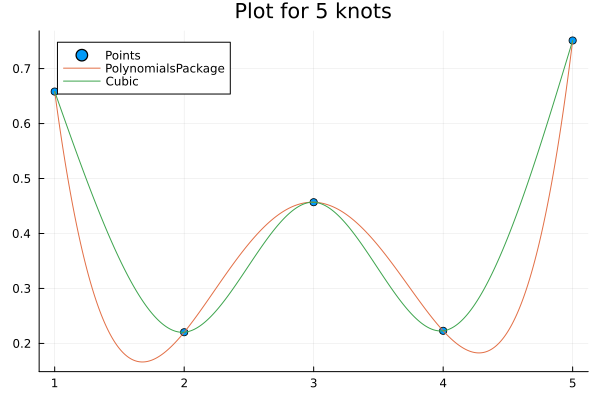

In [23]:
using Interpolations

forInterpolation = 1:0.01:5
X1 = 1:5
Y1 = [rand() for x in X1]
scatter(X1, Y1, label="Points")

polynomial = fit(X1, Y1)
ysf1 = [polynomial(x) for x in forInterpolation]
plot!(forInterpolation, ysf1, label="PolynomialsPackage")

cubic = interpolate(Y1, BSpline(Cubic(Natural(OnGrid()))))
ysf2 = [cubic(x) for x in forInterpolation]
plot!(forInterpolation, ysf2, label="Cubic", title="Plot for 5 knots")

Funkcja 2:

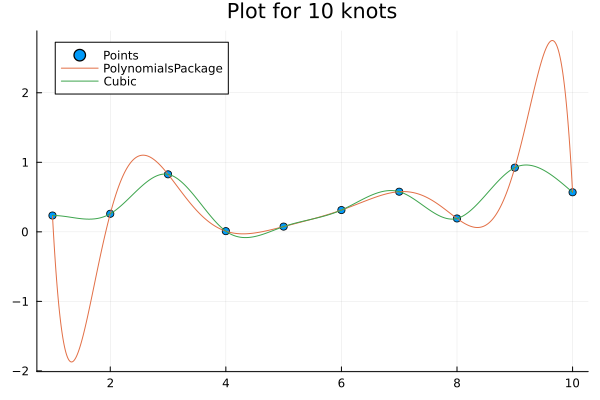

In [25]:
using Interpolations

forInterpolation = 1:0.01:10
X2 = 1:10
Y2 = [rand() for x in X2]
scatter(X2, Y2, label="Points")

polynomial = fit(X2, Y2)
ysf1 = [polynomial(x) for x in forInterpolation]
plot!(forInterpolation, ysf1, label="PolynomialsPackage")

cubic = interpolate(Y2, BSpline(Cubic(Free(OnGrid()))))
ysf2 = [cubic(x) for x in forInterpolation]
plot!(forInterpolation, ysf2, label="Cubic", title = "Plot for 10 knots")